# *BOOSTING TECHNIQUES ASSIGNMENT*

## 1.  What is Boosting in Machine Learning? Explain how it improves weak learners.

Boosting is an ensemble technique that builds a strong model by combining many weak learners sequentially. Each new learner focuses on the mistakes of the previous ensemble (hard examples). By giving more weight to misclassified examples (or fitting residuals), the ensemble reduces bias and produces a much stronger predictor than individual weak learners.

## 2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained? 

- **AdaBoost**: Reweights training samples after each weak learner. Mistakes get higher weights so next learner focuses on them. Combines learners by weighted voting (classification) using weights derived from learners’ errors. Loss perspective: exponential loss. Typical base learner: decision stump.

- **Gradient Boosting**: Each new learner is trained to fit the negative gradient (residuals) of the loss function of the ensemble — think: it fits what's left to predict. Uses additive modeling with a learning rate and flexible loss functions (MSE, logistic, etc.). Typical base learner: shallow decision tree.

## 3. How does regularization help in XGBoost?

XGBoost includes explicit regularization in its objective: L1 (alpha) and L2 (lambda) penalties on leaf weights, plus tree-structure penalties like gamma (minimum loss reduction to make a split). Other controls: `max_depth`, `subsample`, `colsample_bytree`, and `learning_rate`. Regularization limits leaf weight magnitude and tree complexity, reducing overfitting and improving generalization.

## 4. Why is CatBoost considered efficient for handling categorical data? 

CatBoost uses ordered target statistics and permutation-driven encodings that avoid target leakage, plus efficient native handling of categorical features (no naive one-hot explosion). It builds symmetric (oblivious) trees that are fast and stable. Result: better accuracy on tabular data with many categorical features, fewer preprocessing steps, and less overfitting from naive encodings.

## 5. What are some real-world applications where boosting techniques are preferred over bagging methods?

- Credit scoring / loan default prediction (tabular, heterogeneous features)
- Fraud detection (imbalanced, complex interactions)
- Ad click-through-rate prediction / ranking problems
- Churn prediction, customer lifetime value modeling
- Medical diagnostics with structured data

Why boosting: excels on tabular data, captures complex feature interactions, often yields higher predictive accuracy than bagging (like random forest), and can handle imbalance/weighting more directly.

## 6. Write a Python program to: 
● Train an AdaBoost Classifier on the Breast Cancer dataset 
● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"AdaBoost accuracy: {acc:.4f}")


AdaBoost accuracy: 0.9561


## 7. Write a Python program to: 
● Train a Gradient Boosting Regressor on the California Housing dataset 
● Evaluate performance using R-squared score 

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Evaluate
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"GradientBoosting R^2: {r2:.4f}")


GradientBoosting R^2: 0.7756


## 8. Write a Python program to: 
- Train an XGBoost Classifier on the Breast Cancer dataset 
- Tune the learning rate using GridSearchCV 
- Print the best parameters and accuracy 

In [ ]:
!pip install xgboost

import warnings
warnings.filterwarnings('ignore')


In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model + grid
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=0)
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2]}
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best = grid.best_estimator_
y_pred = best.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best params:", grid.best_params_)
print(f"Test accuracy with best params: {acc:.4f}")


Best params: {'learning_rate': 0.1}
Test accuracy with best params: 0.9474


## 9. Write a Python program to: 
- Train a CatBoost Classifier 
- Plot the confusion matrix using seaborn

In [ ]:
!pip install catboost

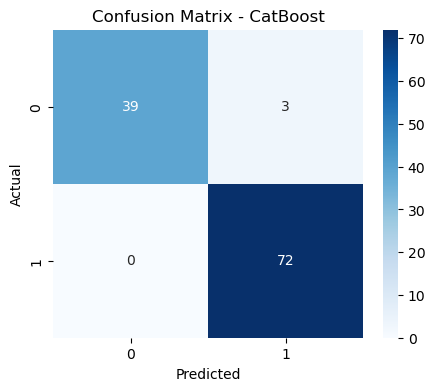

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train
clf = CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0, random_state=42)
clf.fit(X_train, y_train)

# Predict & plot confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()


## 10.  You're working for a FinTech company trying to predict loan default using 
customer demographics and transaction behavior. 
The dataset is imbalanced, contains missing values, and has both numeric and 
categorical features. 
Describe your step-by-step data science pipeline using boosting techniques: 
- Data preprocessing & handling missing/categorical values 
- Choice between AdaBoost, XGBoost, or CatBoost 
- Hyperparameter tuning strategy 
- Evaluation metrics you'd choose and why 
- How the business would benefit from your model

- **Preprocessing:**
    -   Fill missing values (median for numbers, mode for categorical).
    - Encode categorical vars (CatBoost handles directly).
    - Handle imbalance using scale_pos_weight or resampling.

- **Model:**
    - Use CatBoost/XGBoost for tabular data.
    - Tune hyperparams with GridSearchCV or RandomizedSearchCV.

- **Evaluation Metrics:**
    - Use ROC-AUC, PR-AUC, and Recall for imbalanced data.
    - Check confusion matrix for business insight.

- **Business Benefit:**
    - Early defaulter detection → reduced loan losses, better risk control.

In [11]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, pred))


ROC-AUC: 0.998329435349148
